## Setup for AWS notebook -- upgrade tensorflow
The AWS notebook conda_tensorflow2_p36 comes with Tensorflow 2.1.0. 

To get required functionality, upgrade to at least 2.3.0.

In [2]:
pip install --upgrade tensorflow==2.3.0

     |████████████████████████████    | 281.2 MB 76.4 MB/s eta 0:00:01     |██████████████████████▋         | 226.4 MB 72.6 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 320.4 MB 43 kB/s 
     |████████████████████████████████| 5.8 MB 106.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 85.0 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 123.9 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 62.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.5 MB/s s eta 0:00:01
     |████████████████████████████████| 781 kB 95.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 63.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Unins

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-serving-api 2.1.0 requires tensorflow~=2.1.0, but you have tensorflow 2.3.0 which is incompatible.
tensorflow-gpu 2.1.3 requires gast==0.2.2, but you have gast 0.3.3 which is incompatible.
tensorflow-gpu 2.1.3 requires keras-preprocessing==1.1.0, but you have keras-preprocessing 1.1.2 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorboard<2.2.0,>=2.1.0, but you have tensorboard 2.7.0 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorflow-estimator<2.2.0,>=2.1.0rc0, but you have tensorflow-estimator 2.3.0 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### NEED TO RESTART KERNEL AFTER UPDATE!!!

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
print(tf.__version__)

2.3.0


# Testing dataset loading

In [3]:
%run dataset.py

Batch size: 32

Train data:
Found 13656 files belonging to 2 classes.

Test data:
Found 1537 files belonging to 2 classes.


# Training

### ResNet with Dense(1000), Dropout(0.5), Dense(300), Dropout(0.5)

In [6]:
%run train.py --enet-type res_net --n-epochs 10

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.
res_net
Epoch 1/10
427/427 [==============================] - ETA: 0s - loss: 5.6095 - AUC: 0.7581 - accuracy: 0.7569 - precision: 0.5708 - recall: 0.5402
Epoch 00001: saving model to ./training/cp-0001.ckpt
427/427 [==============================] - 124s 291ms/step - loss: 5.6095 - AUC: 0.7581 - accuracy: 0.7569 - precision: 0.5708 - recall: 0.5402 - val_loss: 2.0531 - val_AUC: 0.7329 - val_accuracy: 0.8699 - val_precision: 0.2889 - val_recall: 0.0718
Epoch 2/10
427/427 [==============================] - ETA: 0s - loss: 1.5800 - AUC: 0.8210 - accuracy: 0.7892 - precision: 0.6453 - recall: 0.5532
Epoch 00002: saving model to ./training/cp-0002.ckpt
427/427 [==============================] - 119s 279ms/step - loss: 1.5800 - AUC: 0.8210 - accuracy: 0.7892 - precision: 0.6453 - recall: 0.5532 - val_loss: 0.9262 - val_AUC: 0.7936 - val_accuracy: 0.8861 - val_precision: 0.5789 - val_recall: 0.1215
Epoch 3/

### EfficientNet with Dense(1000), Dropout(0.5), Dense(300), Dropout(0.5)

In [10]:
%run train.py --enet-type eff_net --n-epochs 10

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.
eff_net
Epoch 1/10
427/427 [==============================] - ETA: 0s - loss: 6.3413 - AUC: 0.7625 - accuracy: 0.7583 - precision: 0.5806 - recall: 0.5018
Epoch 00001: saving model to ./training/cp-0001.ckpt
427/427 [==============================] - 120s 282ms/step - loss: 6.3413 - AUC: 0.7625 - accuracy: 0.7583 - precision: 0.5806 - recall: 0.5018 - val_loss: 2.0406 - val_AUC: 0.7604 - val_accuracy: 0.8848 - val_precision: 0.5769 - val_recall: 0.0829
Epoch 2/10
426/427 [============================>.] - ETA: 0s - loss: 1.6305 - AUC: 0.8276 - accuracy: 0.7974 - precision: 0.6826 - recall: 0.5211
Epoch 00002: saving model to ./training/cp-0002.ckpt
427/427 [==============================] - 118s 276ms/step - loss: 1.6297 - AUC: 0.8276 - accuracy: 0.7975 - precision: 0.6825 - recall: 0.5214 - val_loss: 1.1495 - val_AUC: 0.7799 - val_accuracy: 0.8842 - val_precision: 0.6000 - val_recall: 0.0497
Epoch 3/

### VGG16 with Dense(1000), Dropout(0.5), Dense(300), Dropout(0.5)

In [1]:
%run train.py --enet-type vgg16 --n-epochs 10

Batch size: 32

Train data:
Found 13656 files belonging to 2 classes.

Test data:
Found 1537 files belonging to 2 classes.
vgg16
Epoch 1/10
427/427 [==============================] - 194s 454ms/step - loss: 9.4805 - AUC: 0.7426 - accuracy: 0.7491 - precision: 0.5567 - recall: 0.5222 - val_loss: 5.9505 - val_AUC: 0.7534 - val_accuracy: 0.8829 - val_precision: 0.5455 - val_recall: 0.0331
Epoch 2/10
427/427 [==============================] - 120s 282ms/step - loss: 4.6418 - AUC: 0.8237 - accuracy: 0.7948 - precision: 0.6670 - recall: 0.5376 - val_loss: 3.3018 - val_AUC: 0.7844 - val_accuracy: 0.8822 - val_precision: 0.5000 - val_recall: 0.0276
Epoch 3/10
427/427 [==============================] - 120s 282ms/step - loss: 2.6351 - AUC: 0.8607 - accuracy: 0.8196 - precision: 0.7304 - recall: 0.5668 - val_loss: 1.9452 - val_AUC: 0.7860 - val_accuracy: 0.8822 - val_precision: 0.5000 - val_recall: 0.0608
Epoch 4/10
427/427 [==============================] - 120s 282ms/step - loss: 1.6558 - AUC:

# Predict

In [4]:
%run predict.py --enet-type res_net 

Batch size: 32

Train data:
Found 13656 files belonging to 2 classes.

Test data:
Found 1537 files belonging to 2 classes.
Predictions saved to 'results/predictions/predictions-res_net.csv'.


In [3]:
%run predict.py --enet-type eff_net 

Batch size: 32

Train data:
Found 13656 files belonging to 2 classes.

Test data:
Found 1537 files belonging to 2 classes.


Predictions saved to 'results/predictions/predictions-eff_net.csv'.


In [2]:
%run predict.py --enet-type vgg16

Batch size: 32

Train data:
Found 13656 files belonging to 2 classes.

Test data:
Found 1537 files belonging to 2 classes.
Predictions saved to 'results/predictions/predictions-vgg16.csv'.


# Ensemble

In [5]:
%run ensemble.py

Predicted ensembled class labels saved to 'results/predictions/ensembled_labels.csv'.
Predicted ensembled class probabilities saved to 'results/predictions/ensembled_probs.csv'.


# Evaluate

Batch size: 32

Train data:
Found 13656 files belonging to 2 classes.

Test data:
Found 1537 files belonging to 2 classes.

Confusion matrix:
[[1343   13]
 [ 159   22]]

AUC score: 0.8174758389152366

Accuracy: 0.8880936890045543

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1356
         1.0       0.63      0.12      0.20       181

    accuracy                           0.89      1537
   macro avg       0.76      0.56      0.57      1537
weighted avg       0.86      0.89      0.85      1537



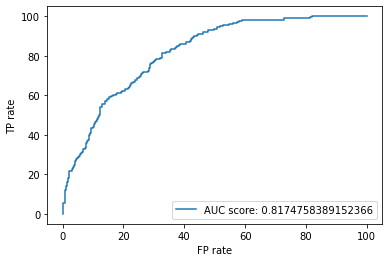

In [6]:
%run evaluate.py

### Version checking

In [2]:

import tensorflow, sklearn, pandas, numpy, re, matplotlib

print("tensorflow==" + tensorflow.__version__)
print("sklearn==" + sklearn.__version__)
print("pandas==" + pandas.__version__)
print("numpy==" + numpy.__version__)
print("re==" + re.__version__)
print("matplotlib==" + matplotlib.__version__)


tensorflow==2.3.0
sklearn==0.24.1
pandas==1.1.5
numpy==1.18.5
re==2.2.1
matplotlib==3.3.4
